In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sn
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import math
import datetime
import platform

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [2]:
print('Python version:', platform.python_version())
print('Tensorflow version:', tf.__version__)

Python version: 3.11.4
Tensorflow version: 2.13.0


In [3]:
%load_ext tensorboard

In [4]:
# Clear any logs from previous runs.
!rm -rf ./.logs/

In [5]:
train = pd.read_csv('/Users/souravdeb/Documents/LEARNING/ML/Internship_Codsoft/Handwritten_digit_Recognition/dataset/train.csv')
test = pd.read_csv('/Users/souravdeb/Documents/LEARNING/ML/Internship_Codsoft/Handwritten_digit_Recognition/dataset/test.csv')
# submission_df = pd.read_csv('/Users/souravdeb/Documents/LEARNING/ML/Internship_Codsoft/Handwritten_digit_Recognition/dataset/sample_submission.csv')


In [6]:
train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
train.info(), train.shape


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42000 entries, 0 to 41999
Columns: 785 entries, label to pixel783
dtypes: int64(785)
memory usage: 251.5 MB


(None, (42000, 785))

In [8]:
test.info(),  test.shape


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28000 entries, 0 to 27999
Columns: 784 entries, pixel0 to pixel783
dtypes: int64(784)
memory usage: 167.5 MB


(None, (28000, 784))

In [9]:
X = train.iloc[:, 1:785]
y = train.iloc[:, 0]

X_test = test.iloc[:, 0:784]

In [10]:
# WARNING: running t-SNE on the full data set takes a while.
X_tsn = X/255

from sklearn.manifold import TSNE
tsne = TSNE()

tsne_res = tsne.fit_transform(X_tsn)

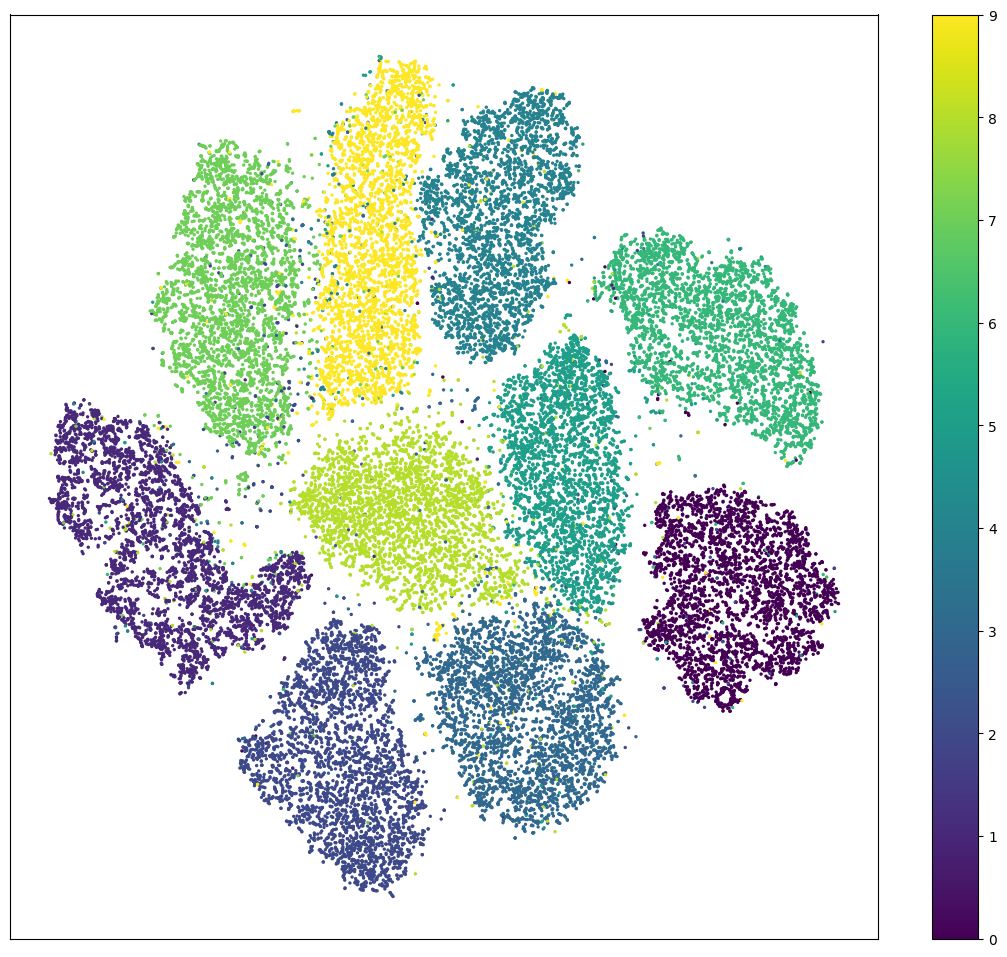

In [11]:
plt.figure(figsize=(14, 12))
plt.scatter(tsne_res[:,0], tsne_res[:,1], c=y, s=2)
plt.xticks([])
plt.yticks([])
plt.colorbar()

In [12]:
from sklearn.model_selection import train_test_split
X_train, X_validation, y_train, y_validation = train_test_split(X, y, test_size = 0.2,random_state = 1212)

In [13]:
print('X_train:', X_train.shape)
print('y_train:', y_train.shape)
print('X_validation:', X_validation.shape)
print('y_validation:', y_validation.shape)


X_train: (33600, 784)
y_train: (33600,)
X_validation: (8400, 784)
y_validation: (8400,)


In [14]:
x_train_re = X_train.to_numpy().reshape(33600, 28, 28)
y_train_re = y_train.values
x_validation_re = X_validation.to_numpy().reshape(8400, 28, 28)
y_validation_re = y_validation.values
x_test_re = test.to_numpy().reshape(28000, 28, 28)

In [15]:
print('x_train:', x_train_re.shape)
print('y_train:', y_train_re.shape)
print('x_validation:', x_validation_re.shape)
print('y_validation:', y_validation_re.shape)
print('x_test:', x_test_re.shape)

x_train: (33600, 28, 28)
y_train: (33600,)
x_validation: (8400, 28, 28)
y_validation: (8400,)
x_test: (28000, 28, 28)


In [16]:
# Save image parameters to the constants that we will use later for data re-shaping and for model traning.
(_, IMAGE_WIDTH, IMAGE_HEIGHT) = x_train_re.shape
IMAGE_CHANNELS = 1

print('IMAGE_WIDTH:', IMAGE_WIDTH);
print('IMAGE_HEIGHT:', IMAGE_HEIGHT);
print('IMAGE_CHANNELS:', IMAGE_CHANNELS);

IMAGE_WIDTH: 28
IMAGE_HEIGHT: 28
IMAGE_CHANNELS: 1


In [17]:
pd.DataFrame(x_train_re[0])

,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,26,27
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,155,155,12,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,254,254,103,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,254,254,55,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,254,254,20,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,254,170,6,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,242,37,0,0,0,0,0,0,0,0


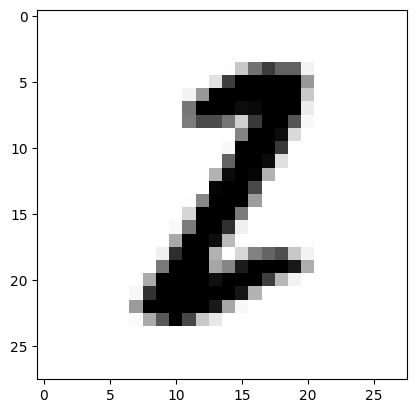

In [18]:
plt.imshow(x_train_re[0], cmap=plt.cm.binary)
plt.show()

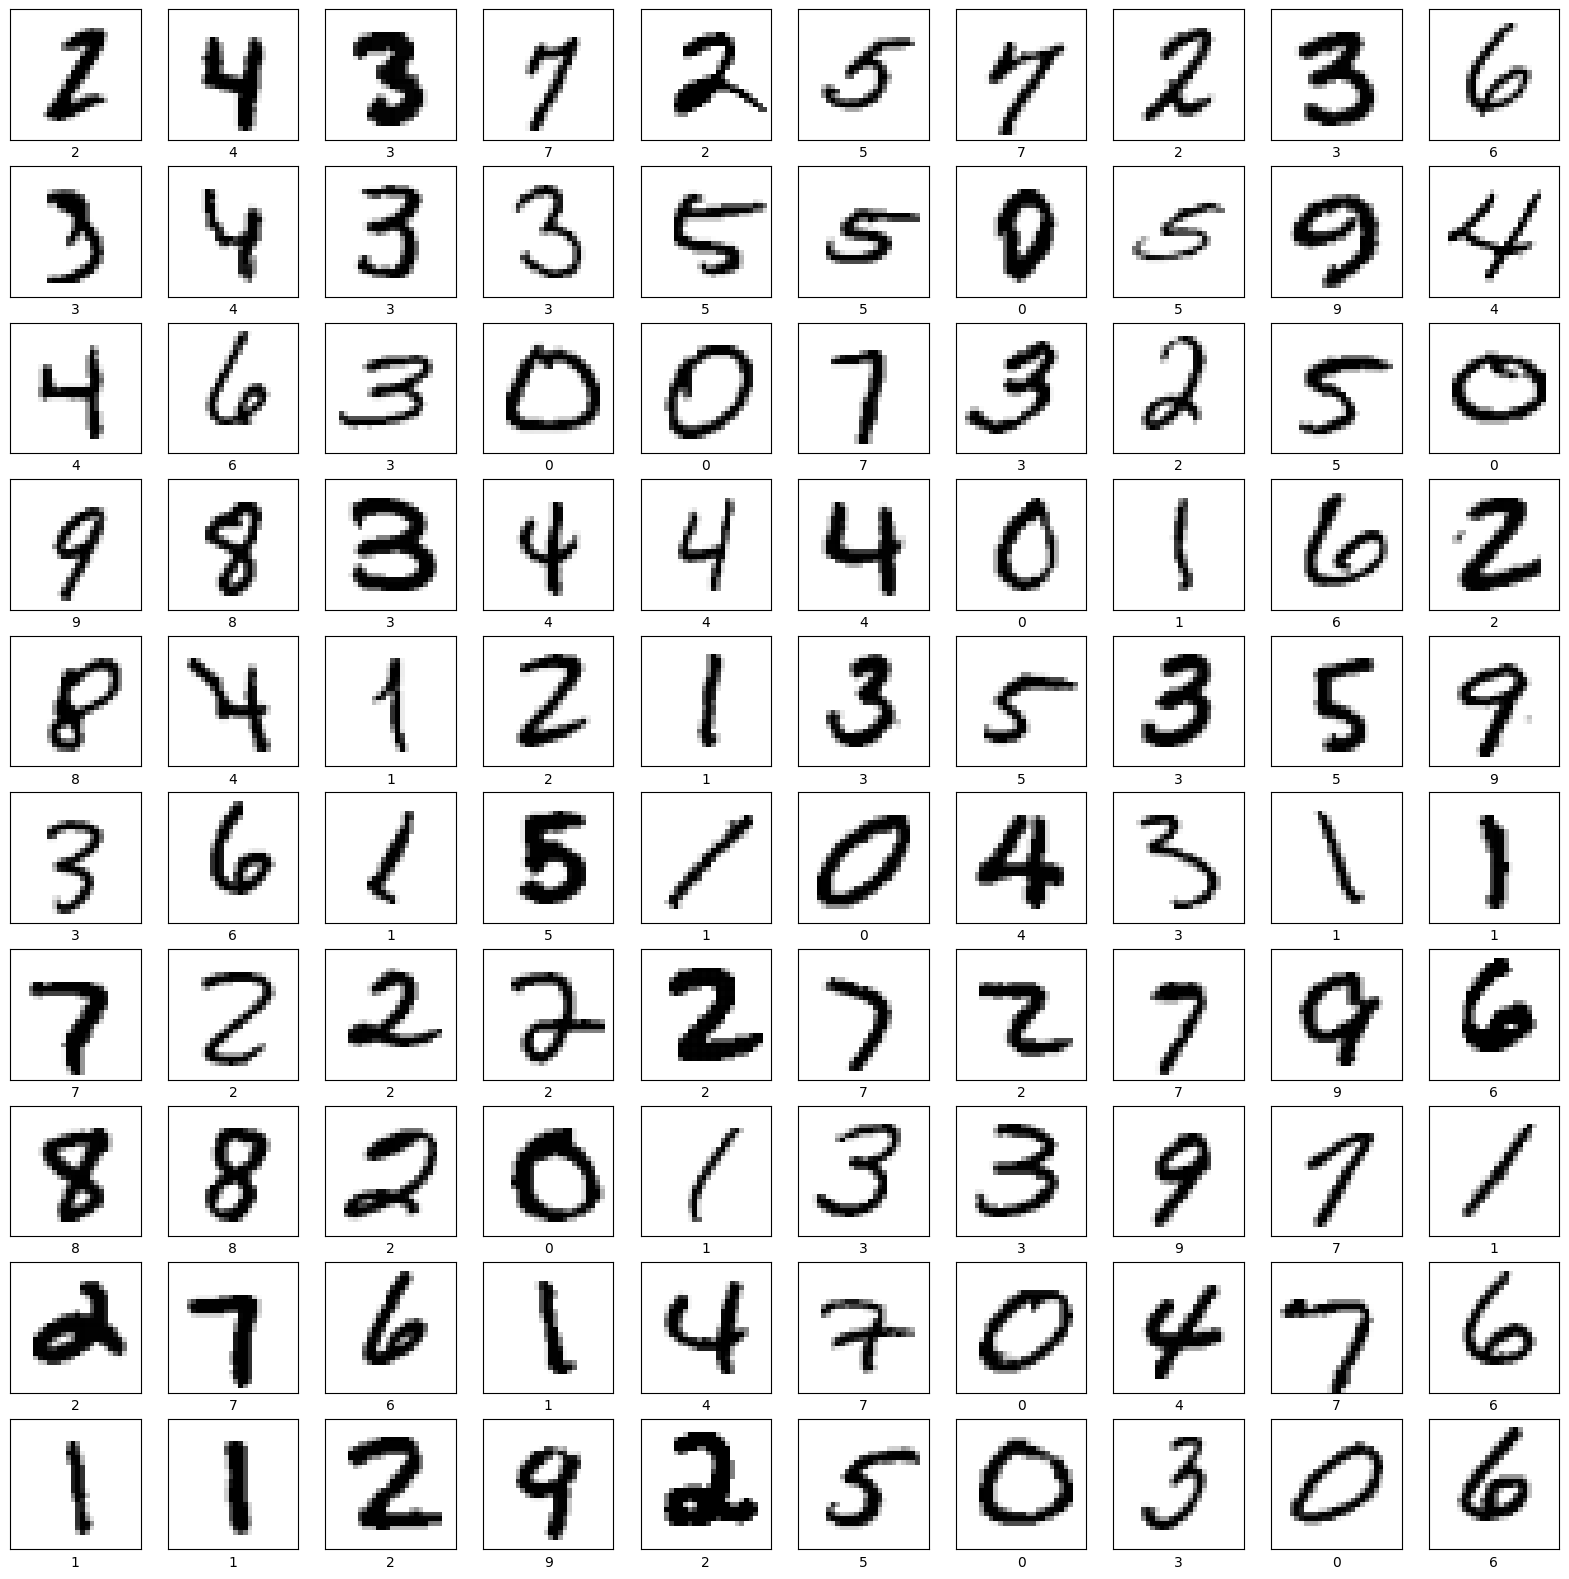

In [19]:
numbers_to_display = 100
num_cells = math.ceil(math.sqrt(numbers_to_display))
plt.figure(figsize=(20,20))
for i in range(numbers_to_display):
    plt.subplot(num_cells, num_cells, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train_re[i], cmap=plt.cm.binary)
    plt.xlabel(y_train_re[i])
plt.show()

In [20]:
x_train_with_chanels = x_train_re.reshape(
    x_train_re.shape[0],
    IMAGE_WIDTH,
    IMAGE_HEIGHT,
    IMAGE_CHANNELS
)

x_validation_with_chanels = x_validation_re.reshape(
    x_validation_re.shape[0],
    IMAGE_WIDTH,
    IMAGE_HEIGHT,
    IMAGE_CHANNELS
)

x_test_with_chanels = x_test_re.reshape(
    x_test_re.shape[0],
    IMAGE_WIDTH,
    IMAGE_HEIGHT,
    IMAGE_CHANNELS
)

In [21]:
print('x_train_with_chanels:', x_train_with_chanels.shape)
print('x_validation_with_chanels:', x_validation_with_chanels.shape)
print('x_test_with_chanels:', x_test_with_chanels.shape)

x_train_with_chanels: (33600, 28, 28, 1)
x_validation_with_chanels: (8400, 28, 28, 1)
x_test_with_chanels: (28000, 28, 28, 1)


In [22]:
x_train_normalized = x_train_with_chanels / 255
x_validation_normalized = x_validation_with_chanels / 255
x_test_normalized = x_test_with_chanels / 255

In [23]:
# Let's check just one row from the 0th image to see color chanel values after normalization.
x_train_normalized[0][10]

array([[0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.02352941],
       [0.99607843],
       [0.99607843],
       [0.99607843],
       [0.76862745],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ]])

In [24]:
model = tf.keras.models.Sequential()

model.add(tf.keras.layers.Convolution2D(
    input_shape=(IMAGE_WIDTH, IMAGE_HEIGHT, IMAGE_CHANNELS),
    kernel_size=5,
    filters=8,
    strides=1,
    activation=tf.keras.activations.relu,
    kernel_initializer=tf.keras.initializers.VarianceScaling()
))

model.add(tf.keras.layers.MaxPooling2D(
    pool_size=(2, 2),
    strides=(2, 2)
))

model.add(tf.keras.layers.Convolution2D(
    kernel_size=5,
    filters=16,
    strides=1,
    activation=tf.keras.activations.relu,
    kernel_initializer=tf.keras.initializers.VarianceScaling()
))

model.add(tf.keras.layers.MaxPooling2D(
    pool_size=(2, 2),
    strides=(2, 2)
))

model.add(tf.keras.layers.Flatten())

model.add(tf.keras.layers.Dense(
    units=128,
    activation=tf.keras.activations.relu
));

model.add(tf.keras.layers.Dropout(0.2))

model.add(tf.keras.layers.Dense(
    units=10,
    activation=tf.keras.activations.softmax,
    kernel_initializer=tf.keras.initializers.VarianceScaling()
))

In [25]:
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 24, 24, 8)         208       
                                                                 
 max_pooling2d (MaxPooling2  (None, 12, 12, 8)         0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 8, 8, 16)          3216      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 4, 4, 16)          0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 256)               0         
                                                                 
 dense (Dense)               (None, 128)               3

In [26]:
tf.keras.utils.plot_model(
    model,
    show_shapes=True,
    show_layer_names=True,
)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


In [27]:
adam_optimizer = tf.keras.optimizers.legacy.Adam(learning_rate=0.001)

model.compile(
    optimizer=adam_optimizer,
    loss=tf.keras.losses.sparse_categorical_crossentropy,
    metrics=['accuracy']
)

In [28]:
log_dir=".logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

training_history = model.fit(
    x_train_normalized,
    y_train_re,
    epochs=10,
    validation_data=(x_validation_normalized, y_validation_re),
    callbacks=[tensorboard_callback]
)

print("The model has successfully trained")

Epoch 1/10
1050/1050 [==============================] - 4s 4ms/step - loss: 0.2763 - accuracy: 0.9149 - val_loss: 0.0975 - val_accuracy: 0.9674
Epoch 2/10
1050/1050 [==============================] - 4s 3ms/step - loss: 0.0907 - accuracy: 0.9724 - val_loss: 0.0652 - val_accuracy: 0.9811
Epoch 3/10
1050/1050 [==============================] - 4s 3ms/step - loss: 0.0661 - accuracy: 0.9796 - val_loss: 0.0568 - val_accuracy: 0.9839
Epoch 4/10
1050/1050 [==============================] - 4s 3ms/step - loss: 0.0521 - accuracy: 0.9838 - val_loss: 0.0450 - val_accuracy: 0.9860
Epoch 5/10
1050/1050 [==============================] - 4s 3ms/step - loss: 0.0450 - accuracy: 0.9861 - val_loss: 0.0521 - val_accuracy: 0.9845
Epoch 6/10
1050/1050 [==============================] - 4s 3ms/step - loss: 0.0378 - accuracy: 0.9882 - val_loss: 0.0452 - val_accuracy: 0.9863
Epoch 7/10
1050/1050 [==============================] - 4s 3ms/step - loss: 0.0323 - accuracy: 0.9890 - val_loss: 0.0498 - val_accuracy:

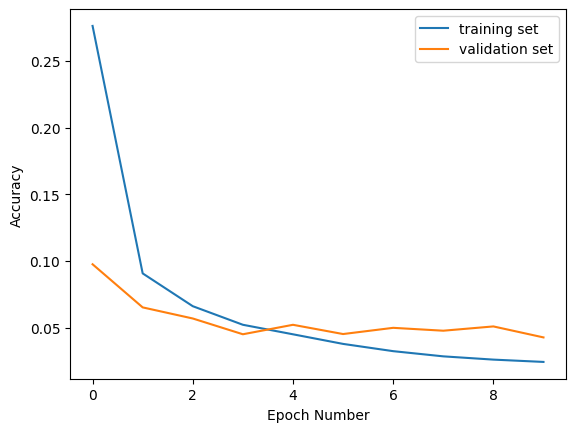

In [29]:
plt.xlabel('Epoch Number')
plt.ylabel('Accuracy')
plt.plot(training_history.history['loss'], label='training set')
plt.plot(training_history.history['val_loss'], label='validation set')
plt.legend()

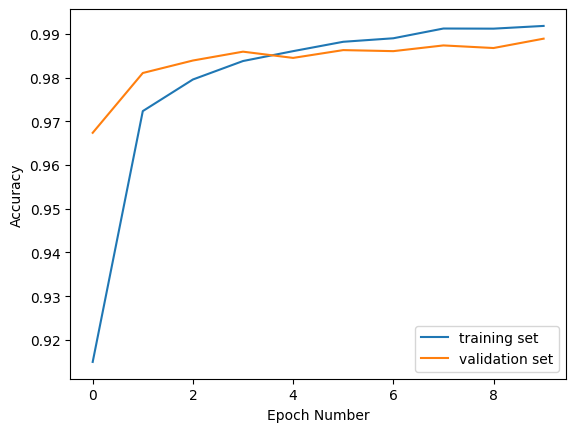

In [30]:
plt.xlabel('Epoch Number')
plt.ylabel('Accuracy')
plt.plot(training_history.history['accuracy'], label='training set')
plt.plot(training_history.history['val_accuracy'], label='validation set')
plt.legend()

In [31]:
%%capture
train_loss, train_accuracy = model.evaluate(x_train_normalized, y_train_re)


In [32]:
print('Train loss: ', train_loss)
print('Train accuracy: ', train_accuracy)

Train loss:  0.009162582457065582
Train accuracy:  0.9971131086349487


In [33]:
%%capture
validation_loss, validation_accuracy = model.evaluate(x_validation_normalized, y_validation_re)

In [34]:
print('Validation loss: ', validation_loss)
print('Validation accuracy: ', validation_accuracy)

Validation loss:  0.042650748044252396
Validation accuracy:  0.9889285564422607


In [35]:
model_name = 'digits_recognition_cnn.h5'
model.save(model_name, save_format='h5')

/opt/homebrew/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [36]:
loaded_model = tf.keras.models.load_model(model_name)

In [37]:
predictions_one_hot = loaded_model.predict([x_validation_normalized])

263/263 [==============================] - 0s 1ms/step


In [38]:
print('predictions_one_hot:', predictions_one_hot.shape)

predictions_one_hot: (8400, 10)


In [39]:
# Predictions in form of one-hot vectors (arrays of probabilities).
pd.DataFrame(predictions_one_hot)

,0,1,2,3,4,5,6,7,8,9
0,2.417345e-07,9.999992e-01,4.050448e-08,3.772193e-12,3.791236e-08,2.581259e-12,1.583623e-09,3.291030e-07,2.003495e-07,1.102392e-10
1,1.944106e-16,3.079271e-11,1.486270e-14,1.000000e+00,2.795096e-15,1.260799e-10,3.172317e-20,2.667288e-11,4.319057e-12,5.102348e-09
2,3.495069e-12,7.378225e-10,6.816101e-08,1.379253e-05,2.079554e-13,2.207196e-07,3.774693e-11,2.499670e-10,9.999859e-01,1.167021e-08
3,4.741415e-08,9.999757e-01,7.415247e-08,2.262544e-09,3.101743e-06,3.909942e-10,2.411961e-08,2.052264e-05,5.038628e-07,5.762369e-08
4,9.349300e-13,2.180828e-13,4.419446e-10,7.880237e-08,1.088577e-05,1.559632e-10,5.502589e-17,5.627655e-06,3.301212e-04,9.996533e-01
...,...,...,...,...,...,...,...,...,...,...
8395,4.692252e-17,8.996294e-13,1.939300e-15,1.914107e-20,1.000000e+00,1.245722e-15,6.277694e-13,1.315158e-14,2.924709e-14,1.168514e-12
8396,3.499153e-12,1.446231e-08,1.425196e-13,5.220587e-07,9.601421e-11,9.999672e-01,3.051488e-05,2.539221e-12,1.752458e-06,6.901784e-14
8397,2.041173e-13,1.404211e-12,5.985002e-12,3.915448e-14,1.399955e-09,8.327093e-15,5.092145e-18,1.000000e+00,2.927976e-13,5.995280e-10
8398,7.818196e-09,7.268941e-12,4.747272e-12,4.122864e-12,3.196745e-11,6.834514e-06,9.999932e-01,3.447337e-17,1.211653e-10,1.041679e-14


In [40]:
# Let's extract predictions with highest probabilites and detect what digits have been actually recognized.
predictions = np.argmax(predictions_one_hot, axis=1)
pd.DataFrame(predictions)

,0
0,1
1,3
2,8
3,1
4,9
...,...
8395,4
8396,5
8397,7
8398,6


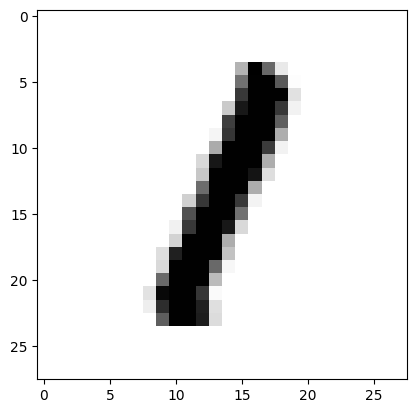

In [41]:
plt.imshow(x_validation_normalized[0].reshape((IMAGE_WIDTH, IMAGE_HEIGHT)), cmap=plt.cm.binary)
plt.show()

/var/folders/8r/3kxnv9fj40g9rbt724_5kr6h0000gn/T/ipykernel_40012/547587288.py:11: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(num_cells, num_cells, plot_index + 1)


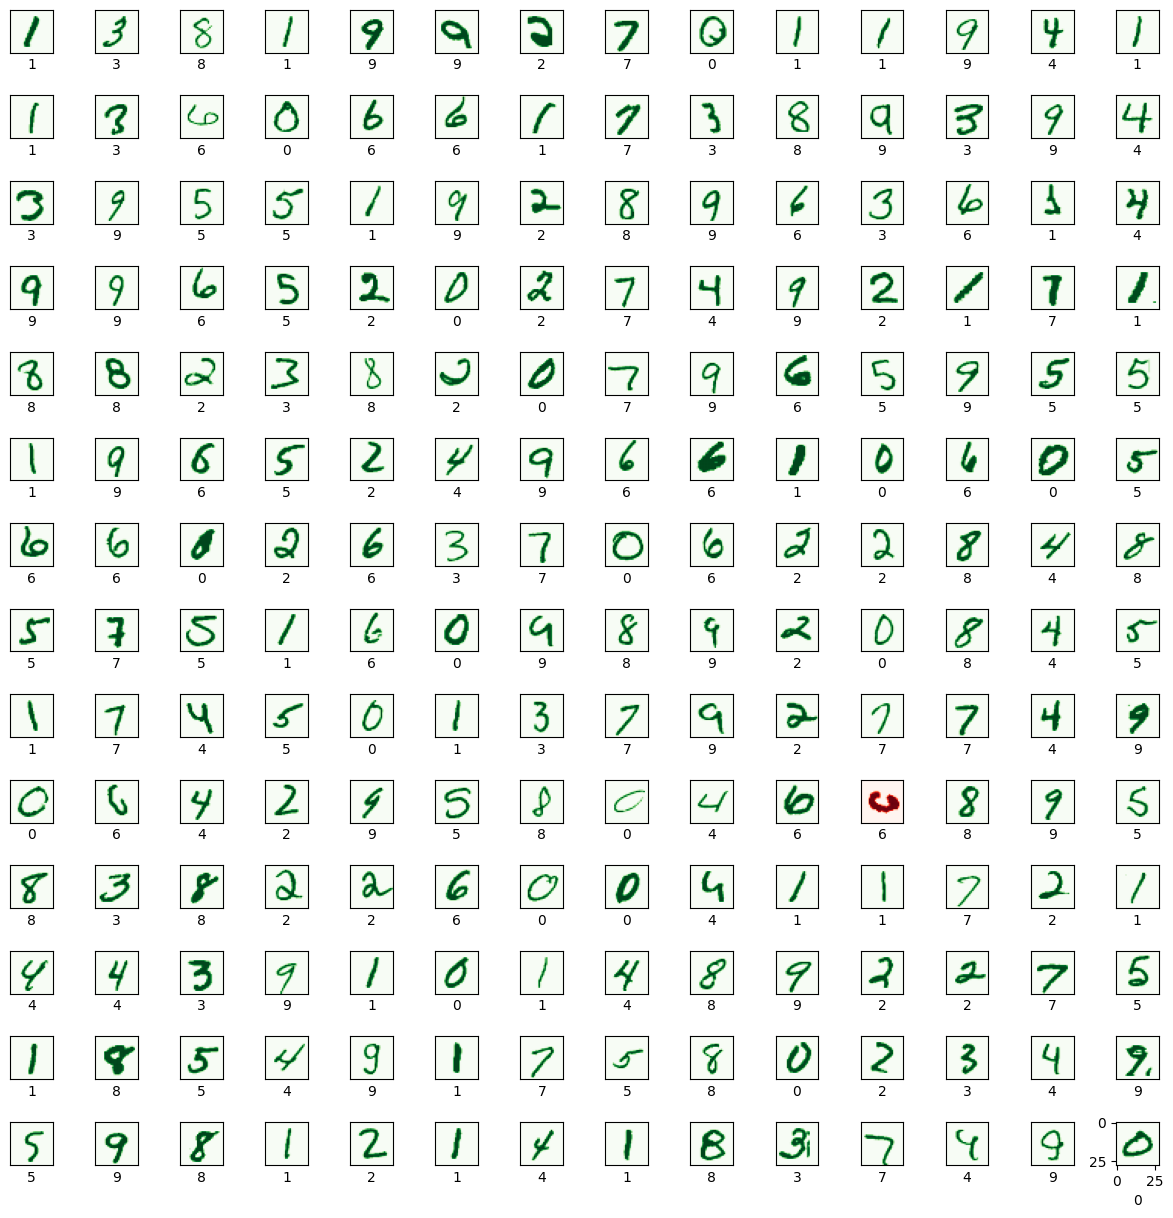

In [42]:
numbers_to_display = 196
num_cells = math.ceil(math.sqrt(numbers_to_display))
plt.figure(figsize=(15, 15))

for plot_index in range(numbers_to_display):    
    predicted_label = predictions[plot_index]
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    color_map = 'Greens' if predicted_label == y_validation_re[plot_index] else 'Reds'
    plt.subplot(num_cells, num_cells, plot_index + 1)
    plt.imshow(x_validation_normalized[plot_index].reshape((IMAGE_WIDTH, IMAGE_HEIGHT)), cmap=color_map)
    plt.xlabel(predicted_label)

plt.subplots_adjust(hspace=1, wspace=0.5)
plt.show()

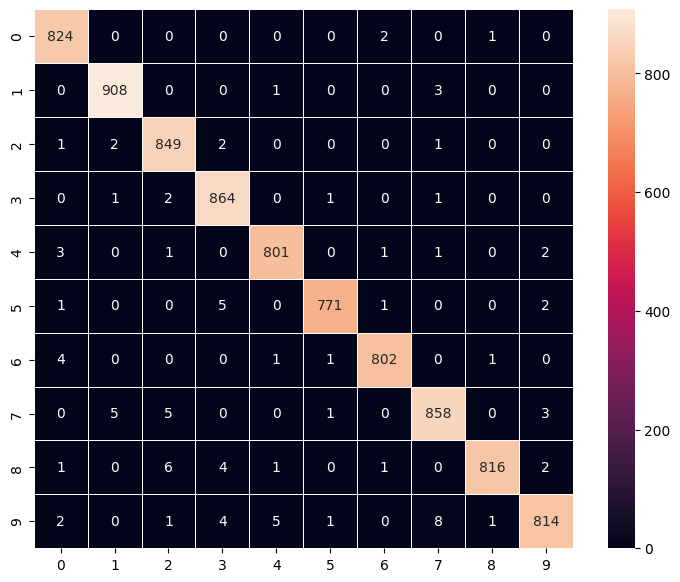

In [43]:
confusion_matrix = tf.math.confusion_matrix(y_validation_re, predictions)
f, ax = plt.subplots(figsize=(9, 7))
sn.heatmap(
    confusion_matrix,
    annot=True,
    linewidths=.5,
    fmt="d",
    square=True,
    ax=ax
)
plt.show()

In [44]:
predictions_one_hot = loaded_model.predict([x_test_normalized])
print('predictions_one_hot:', predictions_one_hot.shape)

875/875 [==============================] - 1s 1ms/step
predictions_one_hot: (28000, 10)


In [45]:
pd.DataFrame(predictions_one_hot)


,0,1,2,3,4,5,6,7,8,9
0,2.368936e-10,7.092950e-10,1.000000e+00,6.202760e-09,2.254190e-13,2.267608e-15,5.924219e-15,8.093473e-09,5.332983e-10,6.777450e-15
1,9.999987e-01,1.011681e-09,1.277243e-06,1.128590e-10,4.501677e-12,9.158591e-10,1.245375e-09,1.962602e-08,9.003776e-11,4.063777e-09
2,8.284416e-12,2.586774e-11,9.220186e-09,1.339167e-08,2.045800e-05,4.194548e-10,3.682970e-14,3.881819e-07,1.682561e-05,9.999623e-01
3,9.434489e-01,3.333958e-11,3.018522e-05,1.610024e-05,7.072395e-07,1.977553e-07,1.463277e-07,1.184799e-06,1.072617e-05,5.649187e-02
4,3.388717e-11,8.812205e-08,1.036689e-08,9.999981e-01,2.446449e-12,1.401203e-09,5.392070e-14,8.604886e-08,1.189549e-06,4.374258e-07
...,...,...,...,...,...,...,...,...,...,...
27995,4.174997e-13,1.125010e-18,5.858299e-12,1.365070e-09,2.780567e-07,9.002331e-09,8.611785e-17,2.641045e-07,1.344533e-07,9.999993e-01
27996,4.949808e-09,3.800231e-11,1.178370e-07,7.520875e-08,5.731062e-11,1.306278e-09,2.909323e-15,9.999958e-01,3.420630e-13,3.880200e-06
27997,1.775802e-17,4.090158e-13,6.247989e-16,1.000000e+00,1.398048e-19,2.898305e-13,8.062251e-22,6.933668e-13,7.780418e-13,1.072426e-11
27998,2.118167e-11,2.643658e-12,7.275169e-10,3.891647e-09,1.084902e-04,1.361529e-09,1.427201e-14,3.407735e-07,2.851270e-10,9.998912e-01


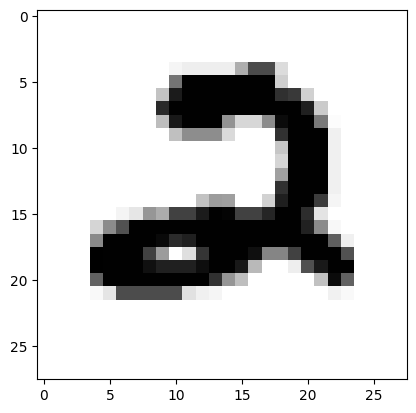

In [46]:
plt.imshow(x_test_normalized[0].reshape((IMAGE_WIDTH, IMAGE_HEIGHT)), cmap=plt.cm.binary)
plt.show()

In [47]:
test_pred = pd.DataFrame( loaded_model.predict([x_test_normalized]))
test_pred = pd.DataFrame(test_pred.idxmax(axis = 1))
test_pred.index.name = 'ImageId'
test_pred = test_pred.rename(columns = {0: 'Label'}).reset_index()
test_pred['ImageId'] = test_pred['ImageId'] + 1

test_pred.head()

875/875 [==============================] - 1s 1ms/step


,ImageId,Label
0,1,2
1,2,0
2,3,9
3,4,0
4,5,3


In [48]:
test_pred.to_csv('submission.csv', index = False)